<a href="https://colab.research.google.com/github/zahwawrr/Predicting-Book-Price-of-A-Bookstore-using-XGBoost/blob/main/FIND_IT_XGB_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Find IT/public-train.csv", delimiter="|")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Find IT/public-test.csv", delimiter="|")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   author_id       3540 non-null   object 
 1   description     3512 non-null   object 
 2   bookformat      3537 non-null   object 
 3   bookedition     231 non-null    object 
 4   pages           3451 non-null   float64
 5   published_date  568 non-null    object 
 6   publisher_id    568 non-null    object 
 7   reading_age     126 non-null    object 
 8   lexile_measure  88 non-null     object 
 9   grade_level     100 non-null    object 
 10  weight          519 non-null    float64
 11  rating_value_0  3540 non-null   float64
 12  rating_value_1  553 non-null    float64
 13  rating_count_0  3550 non-null   int64  
 14  rating_count_1  3550 non-null   int64  
 15  dimension_0     512 non-null    float64
 16  dimension_1     512 non-null    float64
 17  dimension_2     499 non-null    f

In [ ]:
train.isnull().sum()

author_id           10
description         38
bookformat          13
bookedition       3319
pages               99
published_date    2982
publisher_id      2982
reading_age       3424
lexile_measure    3462
grade_level       3450
weight            3031
rating_value_0      10
rating_value_1    2997
rating_count_0       0
rating_count_1       0
dimension_0       3038
dimension_1       3038
dimension_2       3051
genre_0            150
genre_1            197
genre_2            228
genre_3            248
genre_4            280
genre_5            310
genre_6            338
genre_7            378
genre_8            414
genre_9            450
genre_0_weight     150
genre_1_weight     197
genre_2_weight     228
genre_3_weight     248
genre_4_weight     280
genre_5_weight     310
genre_6_weight     338
genre_7_weight     378
genre_8_weight     414
genre_9_weight     450
price             3007
dtype: int64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   author_id       500 non-null    object 
 1   description     492 non-null    object 
 2   bookformat      500 non-null    object 
 3   bookedition     54 non-null     object 
 4   pages           480 non-null    float64
 5   published_date  469 non-null    object 
 6   publisher_id    469 non-null    object 
 7   reading_age     119 non-null    object 
 8   lexile_measure  97 non-null     object 
 9   grade_level     95 non-null     object 
 10  weight          438 non-null    float64
 11  rating_value_0  500 non-null    float64
 12  rating_value_1  444 non-null    float64
 13  rating_count_0  500 non-null    int64  
 14  rating_count_1  500 non-null    int64  
 15  dimension_0     437 non-null    float64
 16  dimension_1     437 non-null    float64
 17  dimension_2     419 non-null    flo

In [ ]:
combined = train.append(test)

In [ ]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4050 entries, 0 to 499
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   author_id       4040 non-null   object 
 1   description     4004 non-null   object 
 2   bookformat      4037 non-null   object 
 3   bookedition     285 non-null    object 
 4   pages           3931 non-null   float64
 5   published_date  1037 non-null   object 
 6   publisher_id    1037 non-null   object 
 7   reading_age     245 non-null    object 
 8   lexile_measure  185 non-null    object 
 9   grade_level     195 non-null    object 
 10  weight          957 non-null    float64
 11  rating_value_0  4040 non-null   float64
 12  rating_value_1  997 non-null    float64
 13  rating_count_0  4050 non-null   int64  
 14  rating_count_1  4050 non-null   int64  
 15  dimension_0     949 non-null    float64
 16  dimension_1     949 non-null    float64
 17  dimension_2     918 non-null    fl

In [ ]:
combined.isnull().sum()

author_id           10
description         46
bookformat          13
bookedition       3765
pages              119
published_date    3013
publisher_id      3013
reading_age       3805
lexile_measure    3865
grade_level       3855
weight            3093
rating_value_0      10
rating_value_1    3053
rating_count_0       0
rating_count_1       0
dimension_0       3101
dimension_1       3101
dimension_2       3132
genre_0            191
genre_1            244
genre_2            283
genre_3            311
genre_4            348
genre_5            383
genre_6            415
genre_7            458
genre_8            496
genre_9            537
genre_0_weight     191
genre_1_weight     244
genre_2_weight     283
genre_3_weight     311
genre_4_weight     348
genre_5_weight     383
genre_6_weight     415
genre_7_weight     458
genre_8_weight     496
genre_9_weight     537
price             3007
dtype: int64

In [ ]:
combined.isnull().mean().sort_values(ascending=False)

lexile_measure    0.954321
grade_level       0.951852
reading_age       0.939506
bookedition       0.929630
dimension_2       0.773333
dimension_0       0.765679
dimension_1       0.765679
weight            0.763704
rating_value_1    0.753827
publisher_id      0.743951
published_date    0.743951
price             0.742469
genre_9           0.132593
genre_9_weight    0.132593
genre_8           0.122469
genre_8_weight    0.122469
genre_7           0.113086
genre_7_weight    0.113086
genre_6_weight    0.102469
genre_6           0.102469
genre_5           0.094568
genre_5_weight    0.094568
genre_4           0.085926
genre_4_weight    0.085926
genre_3           0.076790
genre_3_weight    0.076790
genre_2           0.069877
genre_2_weight    0.069877
genre_1           0.060247
genre_1_weight    0.060247
genre_0           0.047160
genre_0_weight    0.047160
pages             0.029383
description       0.011358
bookformat        0.003210
rating_value_0    0.002469
author_id         0.002469
r

In [ ]:
combined = combined.drop(['reading_age', 'lexile_measure', 'grade_level', 'bookedition'], axis=1)

In [ ]:
combined = combined.dropna(subset=['author_id'])

In [ ]:
combined['bookformat'] = combined['bookformat'].replace("paperback","Paperback")

In [ ]:
combined['published_date'].fillna(method='ffill').fillna(method='bfill', inplace=True)
combined['publisher_id'].fillna(method='ffill').fillna(method='bfill', inplace=True)

In [ ]:
import numpy as np

combined['published_date'] = combined['published_date'].replace('BYR); 2nd Printing editio',np.NaN)
combined['published_date'] = combined['published_date'].replace('BCE/BOMC) editio',np.NaN)
combined['published_date'] = combined['published_date'].replace('1 i',np.NaN)
combined['published_date'] = combined['published_date'].replace('BYR); First editio',np.NaN)

In [ ]:
combined['published_date'].fillna(method='bfill', inplace=True)
combined['publisher_id'].fillna(method='bfill', inplace=True)
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4040 entries, 0 to 499
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   author_id       4040 non-null   object 
 1   description     4004 non-null   object 
 2   bookformat      4037 non-null   object 
 3   pages           3931 non-null   float64
 4   published_date  4040 non-null   object 
 5   publisher_id    4040 non-null   object 
 6   weight          957 non-null    float64
 7   rating_value_0  4040 non-null   float64
 8   rating_value_1  997 non-null    float64
 9   rating_count_0  4040 non-null   int64  
 10  rating_count_1  4040 non-null   int64  
 11  dimension_0     949 non-null    float64
 12  dimension_1     949 non-null    float64
 13  dimension_2     918 non-null    float64
 14  genre_0         3859 non-null   object 
 15  genre_1         3806 non-null   object 
 16  genre_2         3767 non-null   object 
 17  genre_3         3739 non-null   ob

In [ ]:
combined['genre_0'] = combined['genre_0'].fillna(combined['genre_0'].mode()[0])
combined['bookformat'] = combined['bookformat'].fillna(combined['bookformat'].mode()[0])

In [ ]:
combined['description'] = combined['description'].str.lower()

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(combined['bookformat'].astype(str))
combined['bookformat'] = le.transform(combined['bookformat'].astype(str))

le.fit(combined['genre_0'].astype(str))
combined['genre_0'] = le.transform(combined['genre_0'].astype(str))

le.fit(combined['genre_1'].astype(str))
combined['genre_1'] = le.transform(combined['genre_1'].astype(str))

le.fit(combined['genre_2'].astype(str))
combined['genre_2'] = le.transform(combined['genre_2'].astype(str))

le.fit(combined['genre_3'].astype(str))
combined['genre_3'] = le.transform(combined['genre_3'].astype(str))

le.fit(combined['genre_4'].astype(str))
combined['genre_4'] = le.transform(combined['genre_4'].astype(str))

le.fit(combined['genre_5'].astype(str))
combined['genre_5'] = le.transform(combined['genre_5'].astype(str))

le.fit(combined['genre_6'].astype(str))
combined['genre_6'] = le.transform(combined['genre_6'].astype(str))

le.fit(combined['genre_7'].astype(str))
combined['genre_7'] = le.transform(combined['genre_7'].astype(str))

le.fit(combined['genre_8'].astype(str))
combined['genre_8'] = le.transform(combined['genre_8'].astype(str))

le.fit(combined['genre_9'].astype(str))
combined['genre_9'] = le.transform(combined['genre_9'].astype(str))

le.fit(combined['description'].astype(str))
combined['description'] = le.transform(combined['description'].astype(str))

le.fit(combined['author_id'].astype(str))
combined['author_id'] = le.transform(combined['author_id'].astype(str))

le.fit(combined['publisher_id'].astype(str))
combined['publisher_id'] = le.transform(combined['publisher_id'].astype(str))

le.fit(combined['published_date'].astype(str))
combined['published_date'] = le.transform(combined['published_date'].astype(str))

In [ ]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4040 entries, 0 to 499
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   author_id       4040 non-null   int64  
 1   description     4040 non-null   int64  
 2   bookformat      4040 non-null   int64  
 3   pages           3931 non-null   float64
 4   published_date  4040 non-null   int64  
 5   publisher_id    4040 non-null   int64  
 6   weight          957 non-null    float64
 7   rating_value_0  4040 non-null   float64
 8   rating_value_1  997 non-null    float64
 9   rating_count_0  4040 non-null   int64  
 10  rating_count_1  4040 non-null   int64  
 11  dimension_0     949 non-null    float64
 12  dimension_1     949 non-null    float64
 13  dimension_2     918 non-null    float64
 14  genre_0         4040 non-null   int64  
 15  genre_1         4040 non-null   int64  
 16  genre_2         4040 non-null   int64  
 17  genre_3         4040 non-null   in

In [ ]:
# import seaborn as sns

# sns.displot(combined['pages'])
# sns.displot(combined['weight'])
# sns.displot(combined['rating_value_1'])
# sns.displot(combined['dimension_0'])
# sns.displot(combined['dimension_1'])
# sns.displot(combined['dimension_2'])
# sns.displot(combined['genre_0_weight'])
# sns.displot(combined['genre_1_weight'])
# sns.displot(combined['genre_2_weight'])
# sns.displot(combined['genre_3_weight'])
# sns.displot(combined['genre_4_weight'])
# sns.displot(combined['genre_5_weight'])
# sns.displot(combined['genre_6_weight'])
# sns.displot(combined['genre_7_weight'])
# sns.displot(combined['genre_8_weight'])
# sns.displot(combined['genre_9_weight'])

In [ ]:
import scipy.stats

train_clock = combined
mean_clock = combined['pages'].mean()
mean_clock = round(mean_clock,0)
train_clock['pages'] = train_clock['pages'].fillna(mean_clock)

mean_clock = combined['weight'].mean()
mean_clock = round(mean_clock,2)
train_clock['weight'] = train_clock['weight'].fillna(mean_clock)

mean_clock = combined['rating_value_1'].mean()
mean_clock = round(mean_clock,2)
train_clock['rating_value_1'] = train_clock['rating_value_1'].fillna(mean_clock)

mean_clock = combined['dimension_0'].mean()
mean_clock = round(mean_clock,2)
train_clock['dimension_0'] = train_clock['dimension_0'].fillna(mean_clock)

mean_clock = combined['dimension_1'].mean()
mean_clock = round(mean_clock,2)
train_clock['dimension_1'] = train_clock['dimension_1'].fillna(mean_clock)

mean_clock = combined['dimension_2'].mean()
mean_clock = round(mean_clock,2)
train_clock['dimension_2'] = train_clock['dimension_2'].fillna(mean_clock)

mean_clock = 1
mean_clock = round(mean_clock,2)
train_clock['genre_0_weight'] = train_clock['genre_0_weight'].fillna(mean_clock)

mean_clock = 0
mean_clock = round(mean_clock,2)
train_clock['genre_1_weight'] = train_clock['genre_1_weight'].fillna(mean_clock)

train_clock['genre_2_weight'] = train_clock['genre_2_weight'].fillna(mean_clock)

train_clock['genre_3_weight'] = train_clock['genre_3_weight'].fillna(mean_clock)

train_clock['genre_4_weight'] = train_clock['genre_4_weight'].fillna(mean_clock)

train_clock['genre_5_weight'] = train_clock['genre_5_weight'].fillna(mean_clock)

train_clock['genre_6_weight'] = train_clock['genre_6_weight'].fillna(mean_clock)

train_clock['genre_7_weight'] = train_clock['genre_7_weight'].fillna(mean_clock)

train_clock['genre_8_weight'] = train_clock['genre_8_weight'].fillna(mean_clock)

train_clock['genre_9_weight'] = train_clock['genre_9_weight'].fillna(mean_clock)

In [ ]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4040 entries, 0 to 499
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   author_id       4040 non-null   int64  
 1   description     4040 non-null   int64  
 2   bookformat      4040 non-null   int64  
 3   pages           4040 non-null   float64
 4   published_date  4040 non-null   int64  
 5   publisher_id    4040 non-null   int64  
 6   weight          4040 non-null   float64
 7   rating_value_0  4040 non-null   float64
 8   rating_value_1  4040 non-null   float64
 9   rating_count_0  4040 non-null   int64  
 10  rating_count_1  4040 non-null   int64  
 11  dimension_0     4040 non-null   float64
 12  dimension_1     4040 non-null   float64
 13  dimension_2     4040 non-null   float64
 14  genre_0         4040 non-null   int64  
 15  genre_1         4040 non-null   int64  
 16  genre_2         4040 non-null   int64  
 17  genre_3         4040 non-null   in

In [ ]:
print('Pages:\n',combined['pages'].agg(['skew', 'kurtosis']).transpose())
print('Weight:\n',combined['weight'].agg(['skew', 'kurtosis']).transpose())
print('Dimension_0:\n',combined['dimension_0'].agg(['skew', 'kurtosis']).transpose())
print('Dimension_1:\n',combined['dimension_1'].agg(['skew', 'kurtosis']).transpose())
print('Dimension_2:\n',combined['dimension_2'].agg(['skew', 'kurtosis']).transpose())
print('Genre_0_weight:\n',combined['genre_0_weight'].agg(['skew', 'kurtosis']).transpose())
print('Genre_1_weight:\n',combined['genre_1_weight'].agg(['skew', 'kurtosis']).transpose())
print('Genre_2_weight:\n',combined['genre_2_weight'].agg(['skew', 'kurtosis']).transpose())
print('Genre_3_weight:\n',combined['genre_3_weight'].agg(['skew', 'kurtosis']).transpose())
print('Genre_4_weight:\n',combined['genre_4_weight'].agg(['skew', 'kurtosis']).transpose())
print('Genre_5_weight:\n',combined['genre_5_weight'].agg(['skew', 'kurtosis']).transpose())
print('Genre_6_weight:\n',combined['genre_6_weight'].agg(['skew', 'kurtosis']).transpose())
print('Genre_7_weight:\n',combined['genre_7_weight'].agg(['skew', 'kurtosis']).transpose())
print('Genre_8_weight:\n',combined['genre_8_weight'].agg(['skew', 'kurtosis']).transpose())
print('Genre_9_weight:\n',combined['genre_9_weight'].agg(['skew', 'kurtosis']).transpose())

Pages:
 skew        0.817812
kurtosis    3.456479
Name: pages, dtype: float64
Weight:
 skew        1.764223
kurtosis    5.864108
Name: weight, dtype: float64
Dimension_0:
 skew         1.115005
kurtosis    40.022896
Name: dimension_0, dtype: float64
Dimension_1:
 skew         7.318384
kurtosis    62.050343
Name: dimension_1, dtype: float64
Dimension_2:
 skew        -6.540859
kurtosis    85.385554
Name: dimension_2, dtype: float64
Genre_0_weight:
 skew        1.447755
kurtosis    1.528152
Name: genre_0_weight, dtype: float64
Genre_1_weight:
 skew       -0.287906
kurtosis    0.563291
Name: genre_1_weight, dtype: float64
Genre_2_weight:
 skew       -0.128576
kurtosis   -0.005597
Name: genre_2_weight, dtype: float64
Genre_3_weight:
 skew        0.030856
kurtosis    0.135790
Name: genre_3_weight, dtype: float64
Genre_4_weight:
 skew        0.025017
kurtosis   -0.044396
Name: genre_4_weight, dtype: float64
Genre_5_weight:
 skew       -0.028295
kurtosis   -0.104155
Name: genre_5_weight, dtype

In [ ]:
import numpy as np
import seaborn as sns
from math import sqrt

combined['pages'] = np.sqrt(combined['pages'])
combined['weight'] = np.sqrt(combined['weight'])
# combined['dimension_0'] = np.sqrt(combined['dimension_0'])
combined['dimension_1'] = np.log1p(combined['dimension_1'])
combined['dimension_2'] = np.power(combined['dimension_2'],3)
combined['genre_0_weight'] = np.log(combined['genre_0_weight'])

In [ ]:
print('Pages:\n',combined['pages'].agg(['skew', 'kurtosis']).transpose())
print('Weight:\n',combined['weight'].agg(['skew', 'kurtosis']).transpose())
print('Dimension_0:\n',combined['dimension_0'].agg(['skew', 'kurtosis']).transpose())
print('Dimension_1:\n',combined['dimension_1'].agg(['skew', 'kurtosis']).transpose())
print('Dimension_2:\n',combined['dimension_2'].agg(['skew', 'kurtosis']).transpose())
print('Genre_0_weight:\n',combined['genre_0_weight'].agg(['skew', 'kurtosis']).transpose())
print('Genre_1_weight:\n',combined['genre_1_weight'].agg(['skew', 'kurtosis']).transpose())
print('Genre_2_weight:\n',combined['genre_2_weight'].agg(['skew', 'kurtosis']).transpose())
print('Genre_3_weight:\n',combined['genre_3_weight'].agg(['skew', 'kurtosis']).transpose())
print('Genre_4_weight:\n',combined['genre_4_weight'].agg(['skew', 'kurtosis']).transpose())
print('Genre_5_weight:\n',combined['genre_5_weight'].agg(['skew', 'kurtosis']).transpose())
print('Genre_6_weight:\n',combined['genre_6_weight'].agg(['skew', 'kurtosis']).transpose())
print('Genre_7_weight:\n',combined['genre_7_weight'].agg(['skew', 'kurtosis']).transpose())
print('Genre_8_weight:\n',combined['genre_8_weight'].agg(['skew', 'kurtosis']).transpose())
print('Genre_9_weight:\n',combined['genre_9_weight'].agg(['skew', 'kurtosis']).transpose())

Pages:
 skew       -0.550335
kurtosis    1.692094
Name: pages, dtype: float64
Weight:
 skew        0.160189
kurtosis    2.526550
Name: weight, dtype: float64
Dimension_0:
 skew         1.115005
kurtosis    40.022896
Name: dimension_0, dtype: float64
Dimension_1:
 skew         1.481878
kurtosis    18.215690
Name: dimension_1, dtype: float64
Dimension_2:
 skew         0.578244
kurtosis    17.565938
Name: dimension_2, dtype: float64
Genre_0_weight:
 skew        0.476911
kurtosis    0.729100
Name: genre_0_weight, dtype: float64
Genre_1_weight:
 skew       -0.287906
kurtosis    0.563291
Name: genre_1_weight, dtype: float64
Genre_2_weight:
 skew       -0.128576
kurtosis   -0.005597
Name: genre_2_weight, dtype: float64
Genre_3_weight:
 skew        0.030856
kurtosis    0.135790
Name: genre_3_weight, dtype: float64
Genre_4_weight:
 skew        0.025017
kurtosis   -0.044396
Name: genre_4_weight, dtype: float64
Genre_5_weight:
 skew       -0.028295
kurtosis   -0.104155
Name: genre_5_weight, dtype

In [ ]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4040 entries, 0 to 499
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   author_id       4040 non-null   int64  
 1   description     4040 non-null   int64  
 2   bookformat      4040 non-null   int64  
 3   pages           4040 non-null   float64
 4   published_date  4040 non-null   int64  
 5   publisher_id    4040 non-null   int64  
 6   weight          4040 non-null   float64
 7   rating_value_0  4040 non-null   float64
 8   rating_value_1  4040 non-null   float64
 9   rating_count_0  4040 non-null   int64  
 10  rating_count_1  4040 non-null   int64  
 11  dimension_0     4040 non-null   float64
 12  dimension_1     4040 non-null   float64
 13  dimension_2     4040 non-null   float64
 14  genre_0         4040 non-null   int64  
 15  genre_1         4040 non-null   int64  
 16  genre_2         4040 non-null   int64  
 17  genre_3         4040 non-null   in

Pisahin Data

In [ ]:
#kalo dinormalisasi, genrenya yg sama di kolom berbeda jadi berubah
#tadinya kan nonfiction = 12, kalo diminmax di kolom genre_0 non fiction = 0.025 sedangkan genre_1= 0.0249

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# combined.loc[:, combined.columns != 'price'] = scaler.fit_transform(combined.loc[:, combined.columns != 'price'])

In [ ]:
test = combined.iloc[-500:,:]

In [ ]:
train = combined.drop(test.index)
train['price'].replace(0.0, np.NaN, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
trainpriceidx = train.price.notnull()
trainprice = train[trainpriceidx]
trainprice

,author_id,description,bookformat,pages,published_date,publisher_id,weight,rating_value_0,rating_value_1,rating_count_0,rating_count_1,dimension_0,dimension_1,dimension_2,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
501,1024,712,7,16.822604,155,75,71.593226,4.14,4.6,1588,359,17.48,1.068153,11946.169656,51,122,94,92,191,70,70,253,102,290,-1.427116,0.20,0.15,0.13,0.10,0.06,0.05,0.03,0.02,0.02,437874.0
502,2050,2500,2,25.278449,84,79,30.119429,4.21,4.4,54971,1922,16.43,1.690096,14402.116737,26,41,82,105,160,83,35,91,289,14,-0.274437,0.06,0.05,0.03,0.03,0.02,0.01,0.01,0.01,0.01,257989.0
503,316,576,2,21.377558,7,121,48.384295,4.43,4.8,46436,4243,15.43,1.566530,10955.839861,66,127,80,89,25,9,265,15,306,109,-0.967584,0.22,0.17,0.08,0.04,0.02,0.02,0.02,0.02,0.02,179741.0
539,410,3213,2,20.615528,7,121,48.384295,3.58,4.2,2066,512,15.43,1.566530,10955.839861,36,82,29,107,15,288,40,243,38,276,-1.078810,0.25,0.18,0.07,0.06,0.03,0.02,0.02,0.01,0.01,245285.0
540,902,2937,2,16.492423,7,121,33.876098,3.64,4.5,2981,403,22.23,1.264127,18970.074963,15,28,85,155,215,121,212,194,90,12,-0.494296,0.13,0.11,0.08,0.02,0.01,0.01,0.01,0.01,0.01,247739.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,920,1538,2,18.734994,226,95,22.639788,3.83,4.2,71693,5943,15.88,1.570697,13011.038208,47,116,82,149,248,72,35,9,280,108,-1.272966,0.20,0.17,0.09,0.08,0.07,0.03,0.03,0.02,0.02,262176.0
3522,73,566,2,16.031220,32,224,23.811552,4.12,4.7,14157,1407,16.23,1.286474,14190.064461,47,48,7,35,66,150,71,95,38,12,-0.994252,0.25,0.16,0.06,0.04,0.03,0.03,0.03,0.02,0.02,216411.0
3529,885,1354,2,21.071308,160,292,27.931702,3.84,4.4,7758,240,16.26,1.435085,14102.327296,51,24,98,29,246,134,226,194,251,94,-0.843970,0.23,0.07,0.07,0.06,0.05,0.03,0.03,0.03,0.02,152310.0
3538,29,1508,2,8.000000,188,4,57.147703,4.26,4.8,85767,15504,21.34,0.703098,3906.984375,38,48,149,42,57,30,216,234,10,300,-0.941609,0.14,0.09,0.08,0.07,0.06,0.06,0.05,0.04,0.02,176853.0


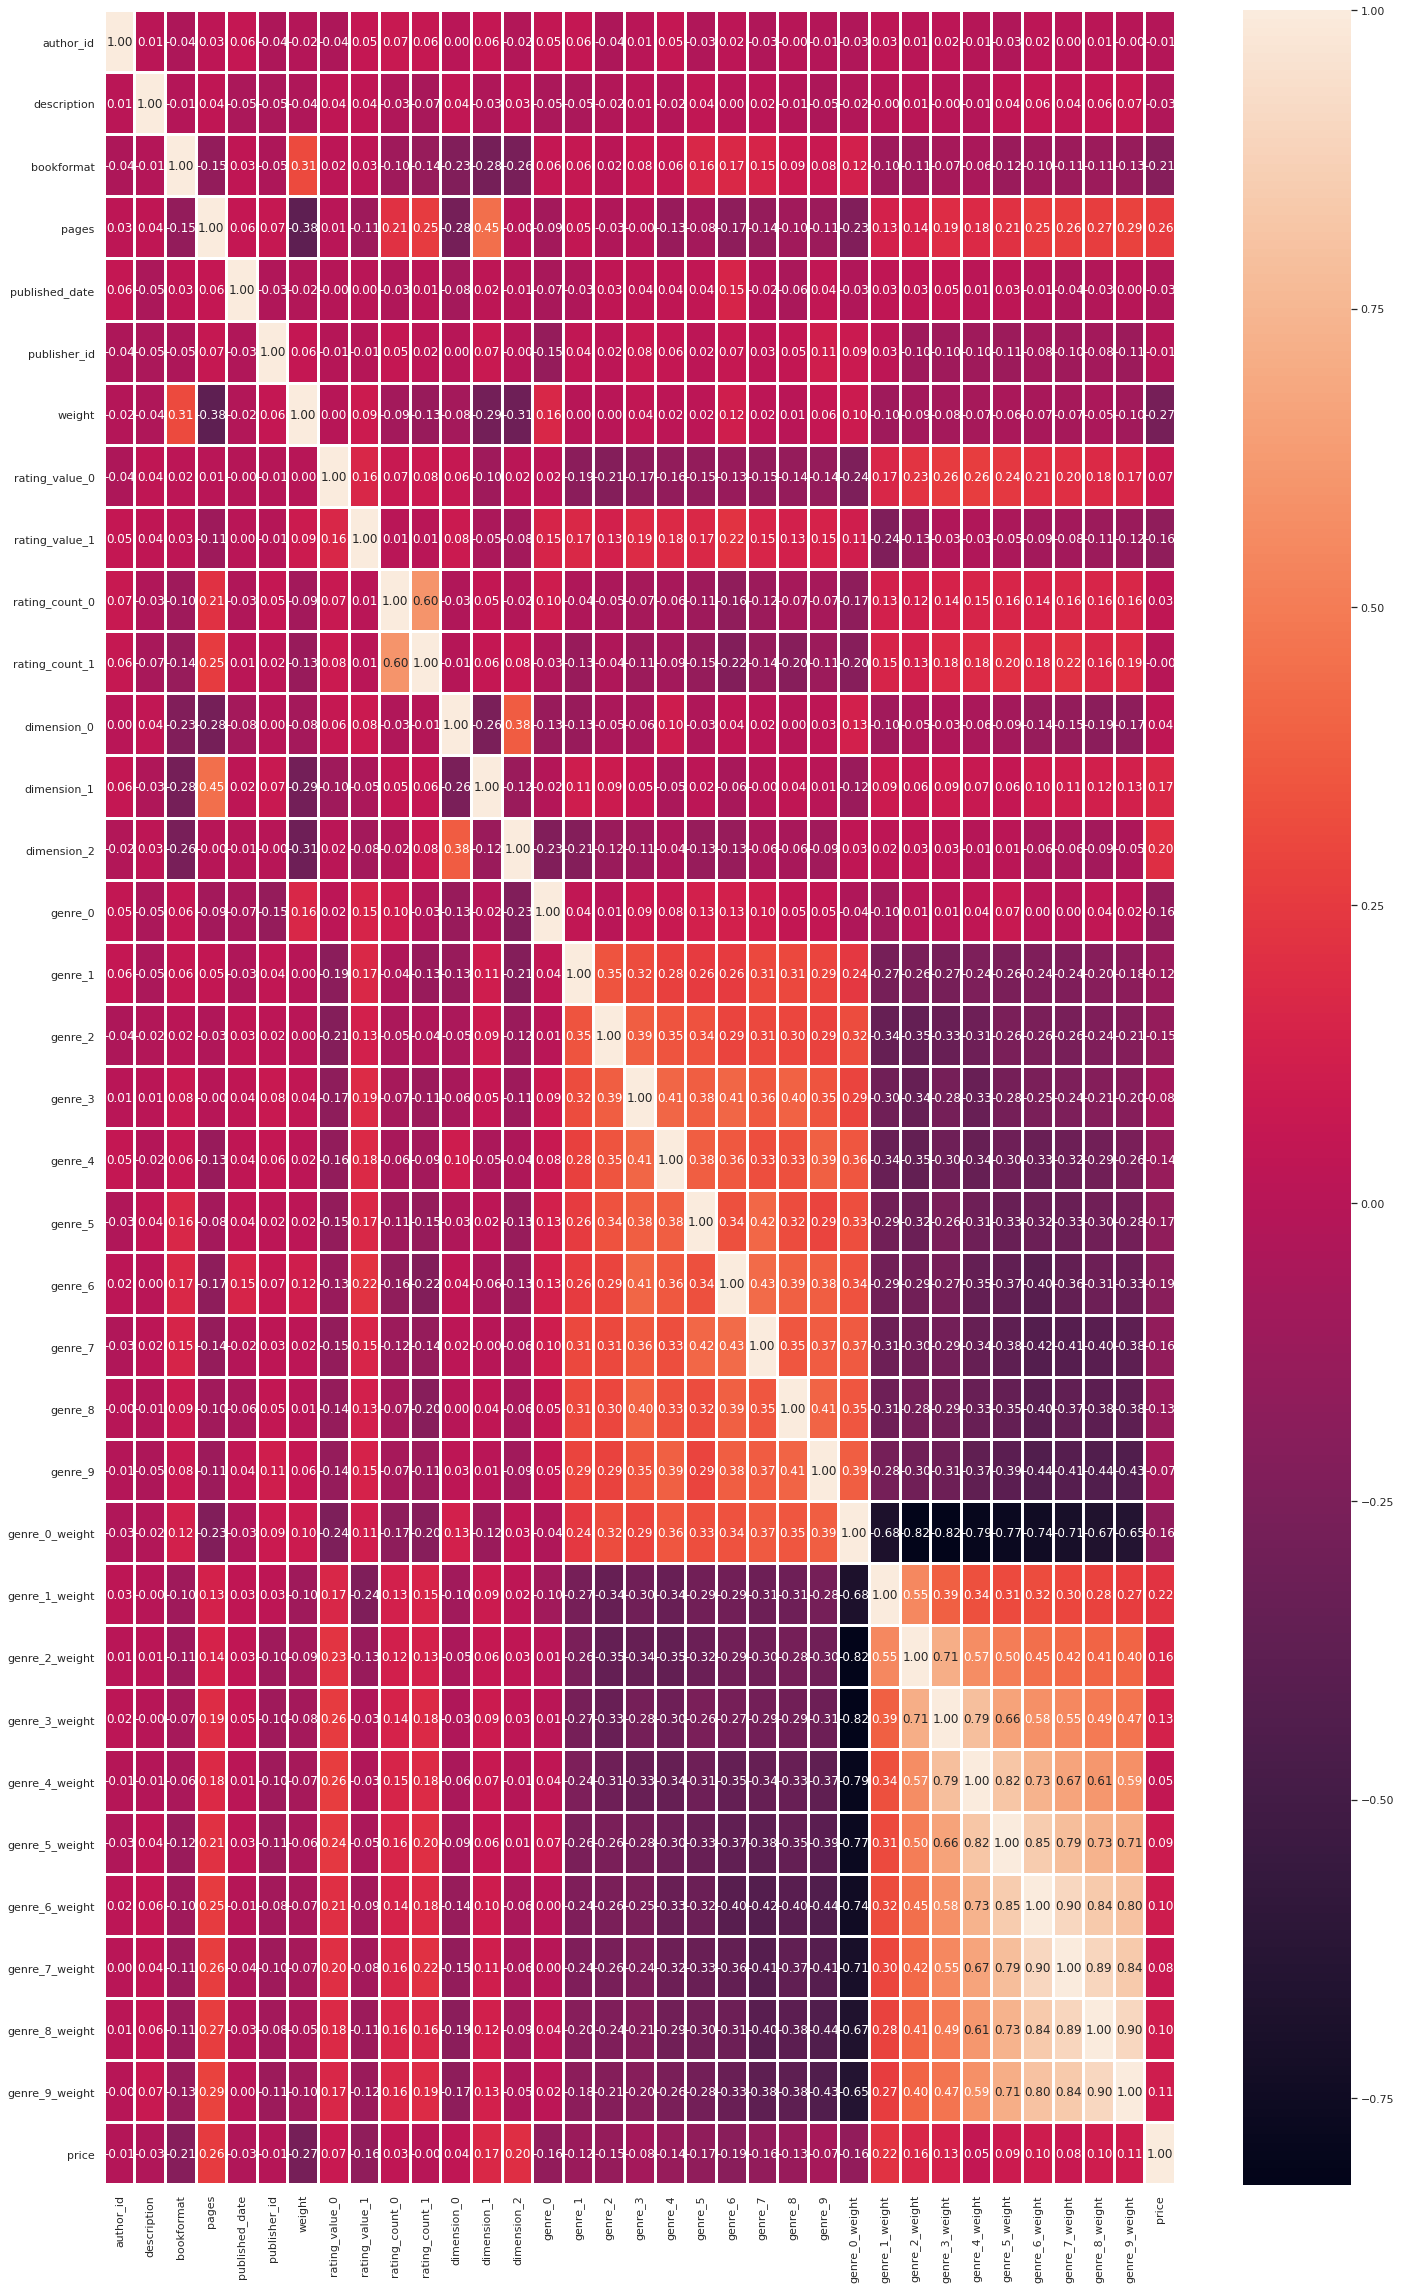

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(24,40)})
sns.heatmap(trainprice.corr(), annot = True, fmt='.2f', linewidth = 2)

In [ ]:
X = trainprice.drop(['price'],axis = 1)
y = trainprice['price']

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from sklearn.metrics import mean_squared_log_error
import lightgbm as lgb

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=21)
# 'reg_alpha': [1.1, 1.2, 1.3],
# 'reg_lambda': [1.1, 1.2, 1.3],
# 'colsample_bytree': [0.7, 0.8],
# 'subsample': [0.7, 0.8, 0.9]

import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror',
                         max_depth=30, 
                             n_estimators=200,
                         reg_alpha = 0.01,
                         colsample_bytree = 0.1)
model.fit(X_train,y_train)

y_pred = np.around(model.predict(X_train),decimals=0)

from sklearn.metrics import mean_squared_error
from sklearn import metrics
import numpy as np
from sklearn.metrics import r2_score

np.sqrt(metrics.mean_squared_error(y_train,y_pred))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


337.3672290173634

In [ ]:
y_pred = np.around(model.predict(X_test),decimals=0)

np.sqrt(metrics.mean_squared_error(y_test,y_pred))

146555.35000696208

Data Unlabel

In [ ]:
trainNULL = train[train.price.isnull()].drop(['price'],axis = 1)
y_null = np.around(model.predict(trainNULL),decimals=0)
y_null

array([215449., 164944., 177509., ..., 174041., 107695., 219076.],
      dtype=float32)

In [ ]:
trainNULL['price'] = y_null
trainNULL

,author_id,description,bookformat,pages,published_date,publisher_id,weight,rating_value_0,rating_value_1,rating_count_0,rating_count_1,dimension_0,dimension_1,dimension_2,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
500,963,1722,7,21.400935,155,75,48.384295,4.25,4.51,70897,1,15.43,1.56653,10955.839861,66,48,67,172,99,24,253,34,308,244,-0.994252,0.21,0.17,0.11,0.04,0.03,0.03,0.02,0.01,0.01,215449.0
504,2276,2848,7,16.970563,7,121,48.384295,3.92,4.51,33181,1,15.43,1.56653,10955.839861,51,43,125,115,25,164,39,45,297,78,-1.272966,0.21,0.17,0.17,0.06,0.03,0.02,0.02,0.02,0.02,164944.0
505,971,414,2,15.968719,7,121,48.384295,3.99,4.51,25413,1,15.43,1.56653,10955.839861,34,48,190,107,8,192,172,85,230,244,-1.108663,0.33,0.09,0.06,0.05,0.05,0.02,0.02,0.02,0.02,177509.0
506,982,163,2,16.000000,7,121,48.384295,3.57,4.51,7531,1,15.43,1.56653,10955.839861,15,28,85,155,215,121,6,133,357,364,-0.478036,0.14,0.11,0.09,0.02,0.01,0.01,0.01,0.00,0.00,217567.0
507,1658,675,2,12.649111,7,121,48.384295,4.01,4.51,34478,1,15.43,1.56653,10955.839861,51,72,81,177,149,37,102,140,47,40,-1.237874,0.24,0.14,0.10,0.09,0.04,0.03,0.03,0.03,0.02,168294.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,1042,1607,7,21.166010,240,32,48.384295,4.19,4.51,172198,1,15.43,1.56653,10955.839861,63,81,50,235,63,60,114,57,136,202,-1.021651,0.24,0.10,0.07,0.07,0.06,0.03,0.02,0.02,0.02,167221.0
3546,2598,2233,2,21.863211,240,32,48.384295,4.21,4.51,43149,1,15.43,1.56653,10955.839861,26,105,4,89,260,208,276,34,11,358,-0.843970,0.18,0.11,0.11,0.04,0.04,0.03,0.02,0.02,0.02,219894.0
3547,1195,1213,2,18.761663,240,32,48.384295,3.55,4.51,5811,1,15.43,1.56653,10955.839861,15,28,138,92,108,299,315,337,357,364,-0.385662,0.14,0.13,0.05,0.01,0.00,0.00,0.00,0.00,0.00,174041.0
3548,1651,780,3,18.275667,240,32,48.384295,4.64,4.51,14,1,15.43,1.56653,10955.839861,35,130,210,240,278,299,315,337,357,364,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,107695.0


In [ ]:
train = pd.merge(trainprice, trainNULL, how='outer')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3041 entries, 0 to 3040
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   author_id       3041 non-null   int64  
 1   description     3041 non-null   int64  
 2   bookformat      3041 non-null   int64  
 3   pages           3041 non-null   float64
 4   published_date  3041 non-null   int64  
 5   publisher_id    3041 non-null   int64  
 6   weight          3041 non-null   float64
 7   rating_value_0  3041 non-null   float64
 8   rating_value_1  3041 non-null   float64
 9   rating_count_0  3041 non-null   int64  
 10  rating_count_1  3041 non-null   int64  
 11  dimension_0     3041 non-null   float64
 12  dimension_1     3041 non-null   float64
 13  dimension_2     3041 non-null   float64
 14  genre_0         3041 non-null   int64  
 15  genre_1         3041 non-null   int64  
 16  genre_2         3041 non-null   int64  
 17  genre_3         3041 non-null   i

In [ ]:
X = train.drop(['price'],axis = 1)
y = train['price']

In [ ]:
from xgboost import XGBClassifier

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=21)

model = xgb.XGBRegressor(objective ='reg:squarederror',
                         max_depth=10, 
                             n_estimators=400,
                         colsample_bytree = 0.5,
                         reg_alpha = 0.1,
                         subsample = 0.9)
# param_grid = {
#     'objective' : ['reg:squarederror'],
#     'n_estimators': [10, 50, 100, 150, 200],
#     'colsample_bytree': [0.7, 0.8],
#     'max_depth': [15,20,25],
#     'reg_alpha': [1.1, 1.2, 1.3],
#     'reg_lambda': [1.1, 1.2, 1.3],
#     'subsample': [0.7, 0.8, 0.9]
# }

# xgb_grid = GridSearchCV(model,
#                         param_grid)
# xgb_grid.fit(X,y)
# xgb_grid.best_score_

In [ ]:
model.fit(X_train,y_train)

y_pred = np.around(model.predict(X_train),decimals=0)

from sklearn.metrics import mean_squared_error
from sklearn import metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error

np.sqrt(metrics.mean_squared_error(y_train,y_pred))

10.474926987561146

In [ ]:
y_pred = np.around(model.predict(X_test),decimals=0)

np.sqrt(metrics.mean_squared_error(y_test,y_pred))

44718.69454572174

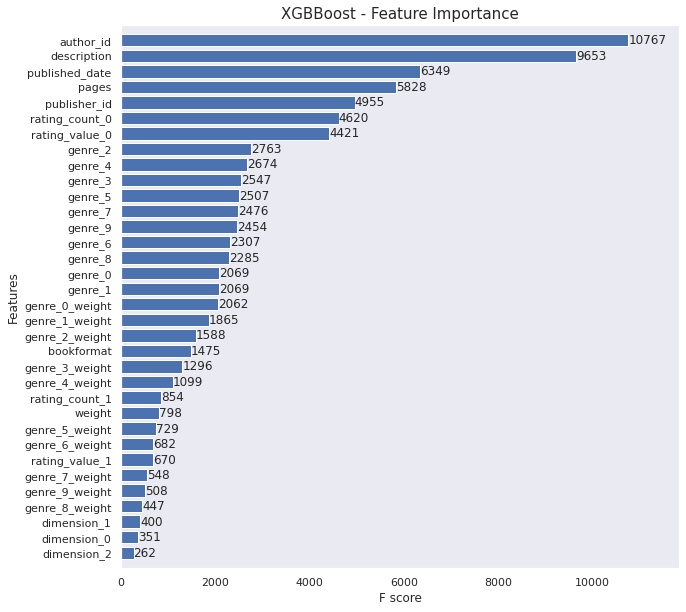

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(model, height=0.8, ax=ax)
ax.grid(False)
plt.title("XGBBoost - Feature Importance", fontsize=15)
plt.show()

Data Test

In [ ]:
X_test = test.drop(['price'],axis = 1)
y_test = test['price']

y_pred = np.around(model.predict(X_test),decimals=0)
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

172761.6098175286